In [1]:
import os
import zipfile

local_zip = '0664343c9a8f11ea.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('0664343c9a8f11ea')
zip_ref.close()

In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv("./0664343c9a8f11ea/dataset/train.csv")
test = pd.read_csv("./0664343c9a8f11ea/dataset/test.csv")

In [4]:
train.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [5]:
classes = train.target.unique().tolist()
classes

['manipuri',
 'bharatanatyam',
 'odissi',
 'kathakali',
 'kathak',
 'sattriya',
 'kuchipudi',
 'mohiniyattam']

In [6]:
import shutil
import random

train_directory = '.\\0664343c9a8f11ea\\dataset\\train_'
val_directory = '.\\0664343c9a8f11ea\\dataset\\val_'

train_file_dir = '.\\0664343c9a8f11ea\\dataset\\train'

files_toshow = []

for class_ in classes:
    path_train = os.path.join(train_directory, class_)
    path_val = os.path.join(val_directory, class_)
    
    if os.path.isdir(path_train) | os.path.isdir(path_train):
        print('Already exists')
        filenames = train.groupby('target')['Image'].get_group(class_).tolist()
        files_toshow.append([(train_file_dir + os.sep + file) 
                             for file in random.sample(filenames, 2)])
        
    else:
        os.mkdir(path_train)
        os.mkdir(path_val)
        
        print('Directory Created ', path_train)
        print('Directory Created ', path_val)
        
        filenames = train.groupby('target')['Image'].get_group(class_).tolist()
        
        val_files = random.sample(filenames, 7)
        train_files = [file for file in filenames if file not in val_files]
        
        files_toshow.append([(train_file_dir + os.sep + file) 
                             for file in random.sample(filenames, 2)])
        
        source = [(train_file_dir + os.sep + file) for file in train_files]
        for f in source:
            shutil.copy(f, path_train)
        print('Class ', class_, ' Images Moved in Train Folder')
        print(class_,' having ', len(train_files), ' files in Train Folder')
        
        source = [(train_file_dir + os.sep + file) for file in val_files]
        for f in source:
            shutil.copy(f, path_val)
        print('Class ', class_, ' Images Moved in Val Folder')
        print(class_,' having ', len(val_files), ' files in Val Folder')

Already exists
Already exists
Already exists
Already exists
Already exists
Already exists
Already exists
Already exists


In [7]:
from matplotlib.cbook import flatten
files = list(flatten(files_toshow))

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4
pic_index = 0

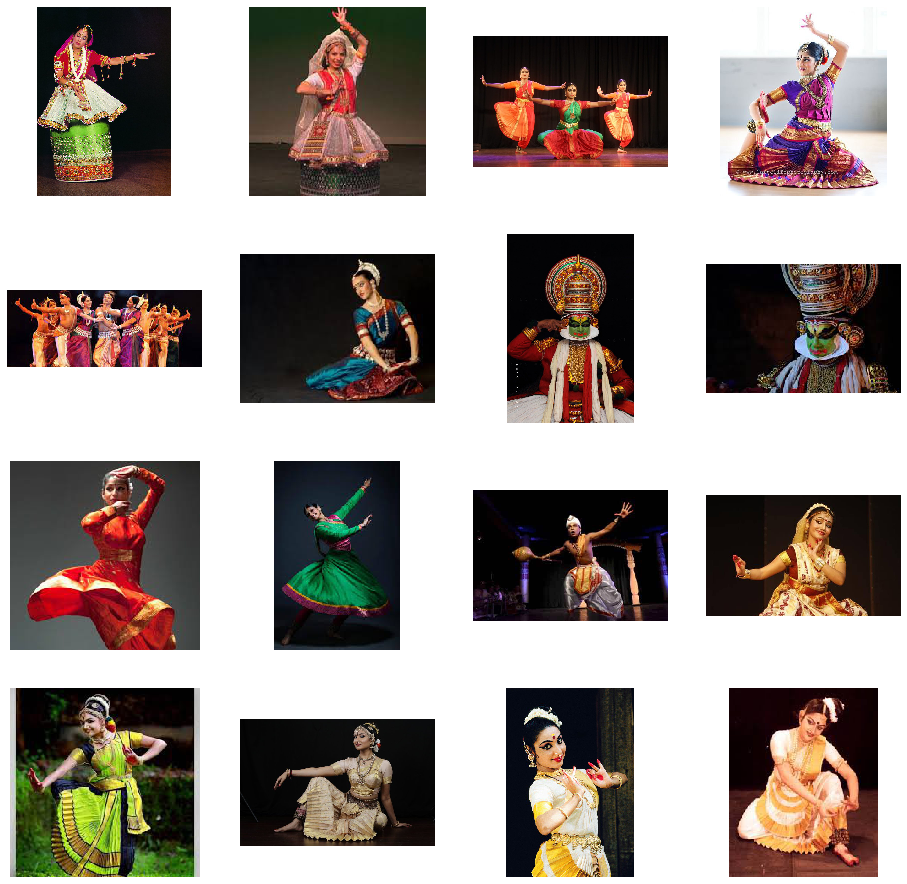

In [9]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

for i, img_path in enumerate(files):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [10]:
import tensorflow as tf
tf.enable_eager_execution()
from tensorflow import keras
tf.keras.backend.clear_session()

C:\Users\hungu\anaconda.x\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hungu\anaconda.x\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hungu\anaconda.x\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hungu\anaconda.x\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255,
                                   zoom_range=0.2)

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(256, 256),
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    val_directory,
    target_size=(256, 256),
    class_mode='categorical')

Found 308 images belonging to 8 classes.
Found 56 images belonging to 8 classes.


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.01),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 8)       584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 8)         584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        1

In [13]:
from tensorflow.keras.optimizers import RMSprop, SGD, Adamax
tf.enable_eager_execution()

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=[tf.keras.metrics.Recall()])

In [14]:
from sklearn.metrics import f1_score
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        print(logs.get('val_acc'))
        if(logs.get('val_acc')==1):
            print("\nReached 100% accuracy so cancelling training!")
            self.model.stop_training = True
        return
            
callbacks = myCallback()

history = model.fit(
    train_generator,
    epochs=30,
    verbose=1,
    validation_data = validation_generator, 
    callbacks=[callbacks])

Epoch 1/30
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
10/10 [==============================] - 21s 2s/step - loss: 2.0959 - recall: 0.0000e+00 - val_loss: 2.0636 - val_recall: 0.0000e+00
Epoch 2/30
10/10 [==============================] - 9s 930ms/step - loss: 2.0437 - recall: 0.0000e+00 - val_loss: 2.0364 - val_recall: 0.0000e+00
Epoch 3/30
10/10 [==============================] - 10s 1s/step - loss: 1.9846 - recall: 0.0032 - val_loss: 1.9982 - val_recall: 0.0000e+00
Epoch 4/30
10/10 [==============================] - 10s 1s/step - loss: 1.7771 - recall: 0.0032 - val_loss: 1.9764 - val_recall: 0.0000e+00
Epoch 5/30
10/10 [==============================] - 10s 1s/step - loss: 1.7073 - recall: 0.1136 - val_loss: 1.9096 - val_recall: 0.0357
Epoch 6/30
10/10 [==============================] - 10s 1s/step - loss: 1.5243 - recall: 0.1526 - val_loss: 1.8130 - val_recall: 0.1250
Epoch 7/30
10/10 [==============================] - 11s 1s/step 

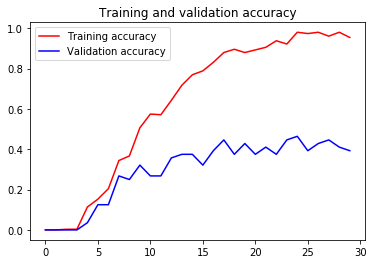

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
acc = history.history['recall']
val_acc = history.history['val_recall']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

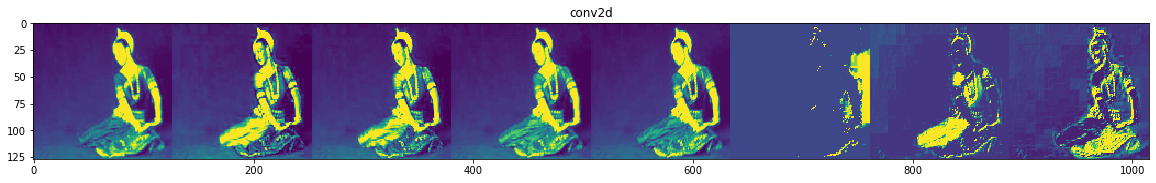

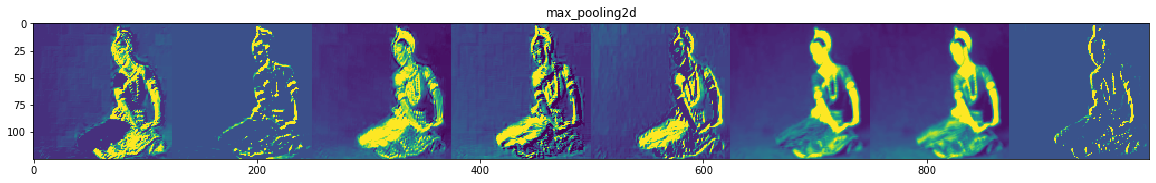

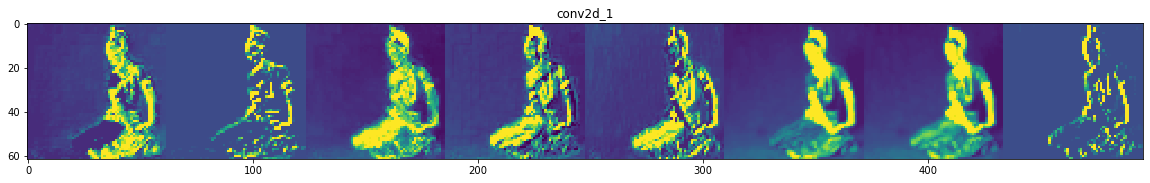

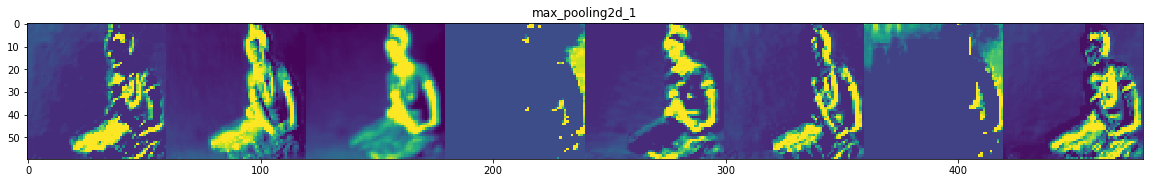

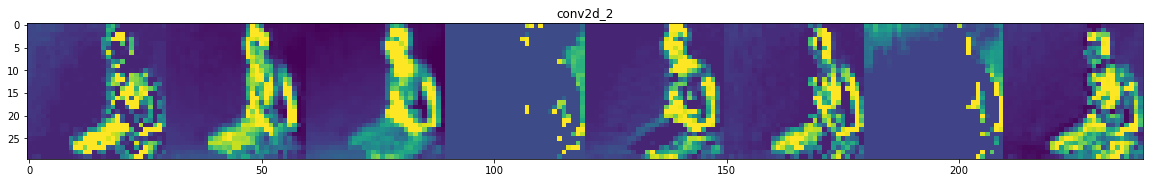

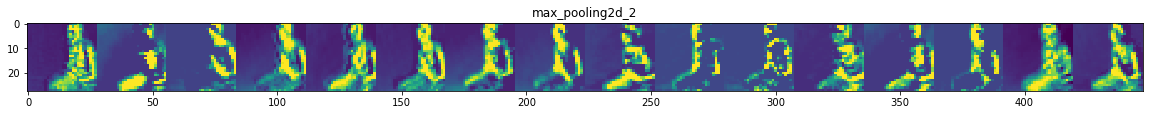

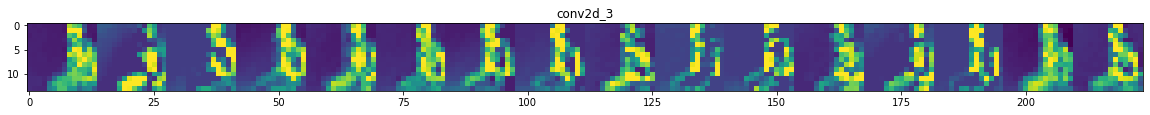

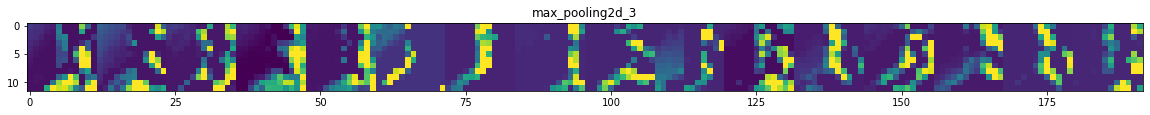

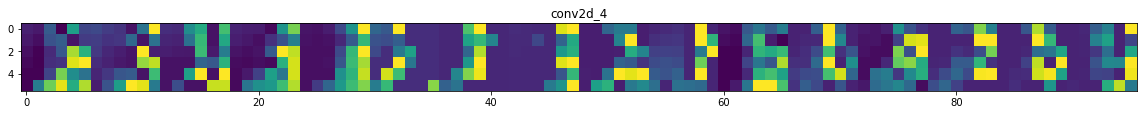

In [17]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img = load_img(files[5], target_size=(256, 256))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x /= 255
successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train.target)

LabelEncoder()

In [19]:
test_file_dir = '.\\0664343c9a8f11ea\\dataset\\test'

test_fn = test.Image.tolist()
test_files_path = [(test_file_dir + os.sep + file) for file in test_fn]

In [20]:
len(test_files_path), test.shape

(156, (156, 1))

In [21]:
from tensorflow.keras.preprocessing import image

pred_test = []
fns = []

for fn in test_files_path:
    path = fn
    img = image.load_img(path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    pred_test.append(np.argmax(classes))
    fns.append(fn)

df = {'Image':test.Image, 'target':encoder.inverse_transform(pred_test)}

In [22]:
submission = pd.DataFrame(df)
submission.to_csv('sub.csv', index=False)

In [23]:
submission.head()

,Image,target
0,508.jpg,kathakali
1,246.jpg,kathakali
2,473.jpg,odissi
3,485.jpg,odissi
4,128.jpg,kathak
